# DataStream Class - Jupyter Notebook Guide

This notebook demonstrates the usage of the `DataStream` class, which provides methods for analyzing time-series data.

### Features:
- **Trimming**: Identifies steady-state regions in data.
- **Statistical Analysis**: Computes mean, standard deviation, confidence intervals, and cumulative statistics.
- **Stationarity Testing**: Uses the Augmented Dickey-Fuller test.
- **Effective Sample Size (ESS)**: Estimates the independent sample size.
- **Optimal Window Size**: Determines the best window for data smoothing.


In [1]:
# Import required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import sys
import os

# Now we can import DataStream
import quends as qnds

## GX Data Analysis

In [2]:
# Specify the file paths
csv_file_path = "gx/tprim_2_0.out.csv"  
csv2_file_path = "gx/ensemble/tprim_2_5_a.out.csv"

In [3]:
data_stream_csv = qnds.from_csv(csv_file_path)
data_stream_gx = qnds.from_csv(csv2_file_path)

In [4]:
data_stream_gx.head()

,time,Phi2_t,Phi2_kxt,Phi2_kyt,Phi2_kxkyt,Phi2_zt,Apar2_t,Apar2_kxt,Apar2_kyt,Apar2_kxkyt,...,ParticleFlux_st,ParticleFlux_kxst,ParticleFlux_kyst,ParticleFlux_kxkyst,ParticleFlux_zst,TurbulentHeating_st,TurbulentHeating_kxst,TurbulentHeating_kyst,TurbulentHeating_kxkyst,TurbulentHeating_zst
0,0.020072,0.000322,1.014122e-06,5.556982e-15,1.283244e-17,0.000004,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,-4.513479e-11,-1.238711e-14,0.000000e+00,0.0,-1.328687e-12
1,2.027322,0.000236,9.462429e-07,1.035192e-05,3.763393e-17,0.000004,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,6.326710e-12,-1.907196e-13,-2.302137e-12,0.0,-1.325463e-12
2,4.034571,0.000198,1.138735e-06,9.805337e-06,1.168341e-16,0.000005,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,-4.022337e-12,-2.190608e-13,-1.575239e-12,0.0,-4.890709e-13
3,6.041821,0.000206,1.060234e-06,9.191237e-06,2.735980e-16,0.000005,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,-1.022327e-11,-3.670521e-13,-1.553083e-13,0.0,-8.325619e-13
4,8.049070,0.000245,1.066248e-06,1.006626e-05,1.340230e-16,0.000005,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,-1.445467e-11,-5.255198e-14,2.001172e-12,0.0,-6.776345e-13


In [5]:
# Get available variables
data_stream_gx.variables()

Index(['time', 'Phi2_t', 'Phi2_kxt', 'Phi2_kyt', 'Phi2_kxkyt', 'Phi2_zt',
       'Apar2_t', 'Apar2_kxt', 'Apar2_kyt', 'Apar2_kxkyt', 'Apar2_zt',
       'Phi2_zonal_t', 'Phi2_zonal_kxt', 'Phi2_zonal_zt', 'Wg_st', 'Wg_kxst',
       'Wg_kyst', 'Wg_kxkyst', 'Wg_zst', 'Wg_lmst', 'Wphi_st', 'Wphi_kxst',
       'Wphi_kyst', 'Wphi_kxkyst', 'Wphi_zst', 'Wapar_st', 'Wapar_kxst',
       'Wapar_kyst', 'Wapar_kxkyst', 'Wapar_zst', 'HeatFlux_st',
       'HeatFlux_kxst', 'HeatFlux_kyst', 'HeatFlux_kxkyst', 'HeatFlux_zst',
       'HeatFluxES_st', 'HeatFluxES_kxst', 'HeatFluxES_kyst',
       'HeatFluxES_kxkyst', 'HeatFluxES_zst', 'HeatFluxApar_st',
       'HeatFluxApar_kxst', 'HeatFluxApar_kyst', 'HeatFluxApar_kxkyst',
       'HeatFluxApar_zst', 'HeatFluxBpar_st', 'HeatFluxBpar_kxst',
       'HeatFluxBpar_kyst', 'HeatFluxBpar_kxkyst', 'HeatFluxBpar_zst',
       'ParticleFlux_st', 'ParticleFlux_kxst', 'ParticleFlux_kyst',
       'ParticleFlux_kxkyst', 'ParticleFlux_zst', 'TurbulentHeating_st',
       'T

In [6]:
# Get the number of rows
len(data_stream_gx)

201

### Stationarity check

In [7]:
# Check if a single column is stationary
data_stream_gx.is_stationary("HeatFlux_st")


# Check if multiple columns are stationary
data_stream_gx.is_stationary(["HeatFlux_st", "Wg_st", 'Phi2_t'])



{'HeatFlux_st': True, 'Wg_st': True, 'Phi2_t': False}

### Trimming data based to obtain steady-state portion

In [8]:
# Trim the data based on standard deviation method
trimmed_df = data_stream_gx.trim(column_name='HeatFlux_st', window_size = 50, method='std')
# View trimmed data
trimmed_df.head()


,time,HeatFlux_st
0,158.592772,8.508736
1,160.600022,8.699987
2,162.607271,8.852156
3,164.614520,8.883341
4,166.621770,8.713289


In [9]:
new_trimmed_df = trimmed_df.trim(column_name='HeatFlux_st', window_size = 50, method='std')
new_trimmed_df.head()

,time,HeatFlux_st
0,158.592772,8.508736
1,160.600022,8.699987
2,162.607271,8.852156
3,164.614520,8.883341
4,166.621770,8.713289


In [10]:
# Trim the data based on threshold method
trimmed_df = data_stream_gx.trim(column_name='HeatFlux_st', window_size = 50, method='threshold', threshold = 0.1 )
# View trimmed data
trimmed_df.head()

,time,HeatFlux_st
0,196.730510,8.860607
1,198.737760,8.808473
2,200.745009,8.586773
3,202.752258,8.324471
4,204.759508,8.198135


In [11]:
# Trim the data based on threshold method
trimmed_df = data_stream_gx.trim(column_name='HeatFlux_st', window_size = 50, method='rolling_variance', threshold = 0.10)
# View trimmed data
trimmed_df.head()

,time,HeatFlux_st
0,196.730510,8.860607
1,198.737760,8.808473
2,200.745009,8.586773
3,202.752258,8.324471
4,204.759508,8.198135


### Effective Sample Size

In [12]:
ess_dict = data_stream_gx.effective_sample_size(column_names = ["HeatFlux_st", 'Wg_st'])
ess_dict

{'HeatFlux_st': 24, 'Wg_st': 10}

In [13]:
ess_df = trimmed_df.effective_sample_size()
ess_df

{'HeatFlux_st': 6}

## UQ Analysis

In [14]:
stats = trimmed_df.compute_statistics(method="sliding")
stats


{'HeatFlux_st': {'mean': 7.815731042731574,
  'mean_uncertainty': 0.05992075505570511,
  'confidence_interval': (7.698286362822392, 7.933175722640756),
  'pm_std': (7.755810287675869, 7.875651797787279)}}

In [15]:
exporter = qnds.Exporter()


exporter.display_dataframe(stats)

,HeatFlux_st
mean,7.815731
mean_uncertainty,0.059921
confidence_interval,"(7.698286362822392, 7.933175722640756)"
pm_std,"(7.755810287675869, 7.875651797787279)"


In [16]:
exporter.display_json(stats)

{
  "HeatFlux_st": {
    "mean": 7.815731042731574,
    "mean_uncertainty": 0.05992075505570511,
    "confidence_interval": [
      7.698286362822392,
      7.933175722640756
    ],
    "pm_std": [
      7.755810287675869,
      7.875651797787279
    ]
  }
}


In [17]:
mean_df = trimmed_df.mean(window_size=10)
mean_df


{'HeatFlux_st': {'mean': 7.814366563829788}}

In [18]:
mean_df = trimmed_df.mean(method="sliding")
mean_df

{'HeatFlux_st': {'mean': 7.815731042731574}}

In [19]:
uq_df = trimmed_df.mean_uncertainty()
uq_df

{'HeatFlux_st': {'mean uncertainty': 0.06152838472523044}}

In [20]:
uq_df = trimmed_df.mean_uncertainty(method="sliding")
uq_df

{'HeatFlux_st': {'mean uncertainty': 0.05992075505570511}}

In [21]:
ci_df = trimmed_df.confidence_interval()
ci_df


#ci_df = trimmed_df.confidence_interval(method="sliding")
#ci_df

{'HeatFlux_st': {'confidence interval': (7.7042140373289225,
   7.9454053054518265)}}

### Optimal Window

In [22]:
optimal_df = trimmed_df.optimal_window_size()
optimal_df

{'HeatFlux_st': {'optimal_window_size': 6,
  'min_std': 0.033216276141473114,
  'mean': 7.811416525170069,
  'ci': (7.7463126239327815, 7.876520426407356)}}

In [23]:
cumulative_df = trimmed_df.cumulative_statistics()
print(cumulative_df)

#cumulative_df = trimmed_df.cumulative_statistics(method="sliding")
#print(cumulative_df)

{'HeatFlux_st': {'cumulative_mean': [8.202884211764706, 8.161908814705882, 8.13882439019608, 8.141834522058824, 8.13650626, 8.12164166862745, 8.11527950420168, 8.113012400735293, 8.11355077124183, 8.109208796470588, 8.091481031016043, 8.05896580980392, 8.019286586877827, 7.977056034453781, 7.937049228235295, 7.9062893033088235, 7.880712787197232, 7.8642028578431376, 7.85440483126935, 7.845785091470589, 7.837113956302521, 7.8248096713903745], 'cumulative_uncertainty': [nan, 0.05794796224421031, 0.057250808980962346, 0.047131167974503625, 0.042520137920967815, 0.05265079451529361, 0.05092571474713757, 0.04758210496480172, 0.04453827802005824, 0.04417894510360353, 0.07220534342793225, 0.1320095536411584, 0.1908979873677785, 0.24208816870276026, 0.2800511704180003, 0.2972185198683052, 0.30649365330634937, 0.30548154358997986, 0.2999310107824136, 0.2944655255951616, 0.2897471462551336, 0.28859370539170043], 'standard_error': [nan, 0.04097539705882314, 0.033053769976482454, 0.023565583987251

In [24]:
exporter.display_dataframe(cumulative_df)

,HeatFlux_st
cumulative_mean,"[8.202884211764706, 8.161908814705882, 8.13882..."
cumulative_uncertainty,"[nan, 0.05794796224421031, 0.05725080898096234..."
standard_error,"[nan, 0.04097539705882314, 0.03305376997648245..."


## CGYRO Data Analysis

In [25]:
# Specify the file paths
csv_file_path = "cgyro/output_nu0_50.csv" 
data_stream_cg = qnds.from_csv(csv_file_path)
data_stream_cg.head()

,Unnamed: 0,time,Q_D/Q_GBD,Q_e/Q_GBD
0,0,0.5,0.003355,0.001669
1,1,1.0,0.003314,0.003338
2,2,1.5,0.003160,0.003941
3,3,2.0,0.002480,0.002337
4,4,2.5,0.002004,0.001941


In [26]:
# Get the number of rows
len(data_stream_cg)

1748

In [27]:
# Trim the data based on threshold method
trimmed_df = data_stream_cg.trim(column_name='Q_D/Q_GBD', window_size = 10, method='std',  robust=True)
# View trimmed data
trimmed_df.head()

,time,Q_D/Q_GBD
0,208.0,12.974854
1,208.5,13.264263
2,209.0,13.563313
3,209.5,13.815548
4,210.0,14.046638


In [28]:
ess_df = trimmed_df.effective_sample_size()
ess_df

{'Q_D/Q_GBD': 28}

In [29]:
# Check if a single column is stationary
data_stream_cg.is_stationary('Q_D/Q_GBD')

{'Q_D/Q_GBD': True}

In [30]:
stats = trimmed_df.compute_statistics(method="sliding")
stats

{'Q_D/Q_GBD': {'mean': 26.485931761077083,
  'mean_uncertainty': 0.3555104298351744,
  'confidence_interval': (25.78913131860014, 27.182732203554025),
  'pm_std': (26.13042133124191, 26.841442190912257)}}

In [31]:
stats = trimmed_df.compute_statistics()
stats

{'Q_D/Q_GBD': {'mean': 26.425842390964057,
  'mean_uncertainty': 0.3564504737003372,
  'confidence_interval': (25.727199462511397, 27.124485319416717),
  'pm_std': (26.06939191726372, 26.782292864664395)}}

In [32]:
# Specify the file paths
csv_file_path = "cgyro/output_nu0_05.csv" 
data_stream_cg = qnds.from_csv(csv_file_path)
data_stream_cg.head()

,Unnamed: 0,time,Q_D/Q_GBD,Q_e/Q_GBD
0,0,0.5,0.003523,0.002042
1,1,1.0,0.003461,0.004020
2,2,1.5,0.003175,0.004207
3,3,2.0,0.002325,0.002291
4,4,2.5,0.002028,0.002228


In [33]:
# Get the number of rows
len(data_stream_cg)

1710

In [34]:
# Trim the data based on threshold method
trimmed_df = data_stream_cg.trim(column_name='Q_D/Q_GBD', window_size = 60, method='rolling_variance')
# View trimmed data
trimmed_df.head()

,time,Q_D/Q_GBD
0,59.0,35.133190
1,59.5,35.663807
2,60.0,36.078209
3,60.5,36.255959
4,61.0,36.713226


In [35]:
stats = trimmed_df.compute_statistics(method="sliding")
stats

{'Q_D/Q_GBD': {'mean': 38.10045767902535,
  'mean_uncertainty': 0.6197965628781142,
  'confidence_interval': (36.88565641578424, 39.31525894226645),
  'pm_std': (37.48066111614723, 38.72025424190346)}}

In [36]:
stats = trimmed_df.compute_statistics()
stats

{'Q_D/Q_GBD': {'mean': 38.068196484668384,
  'mean_uncertainty': 0.6210699095781571,
  'confidence_interval': (36.850899461895196, 39.28549350744157),
  'pm_std': (37.44712657509022, 38.689266394246545)}}

In [37]:
optimal_df = trimmed_df.optimal_window_size(method="sliding")
optimal_df

{'Q_D/Q_GBD': {'optimal_window_size': 6,
  'min_std': 0.28330383581239704,
  'mean': 38.23708208862941,
  'ci': (37.68180657043711, 38.7923576068217)}}

In [38]:
optimal_df = trimmed_df.optimal_window_size()
optimal_df

{'Q_D/Q_GBD': {'optimal_window_size': 711,
  'min_std': 0.10090110673421666,
  'mean': 36.62747894053312,
  'ci': (36.42971277133406, 36.82524510973219)}}

In [39]:
# Trim the data based on threshold method
trimmed_df = data_stream_cg.trim(column_name='Q_D/Q_GBD', window_size = 10, method='std',  robust=True)
# View trimmed data
trimmed_df.head()

,time,Q_D/Q_GBD
0,777.0,110.636703
1,777.5,103.416016
2,778.0,96.325874
3,778.5,86.641785
4,779.0,77.751900


In [40]:
data_stream_cg.is_stationary("Q_D/Q_GBD")

{'Q_D/Q_GBD': True}

In [41]:
plotter=qnds.Plotter()

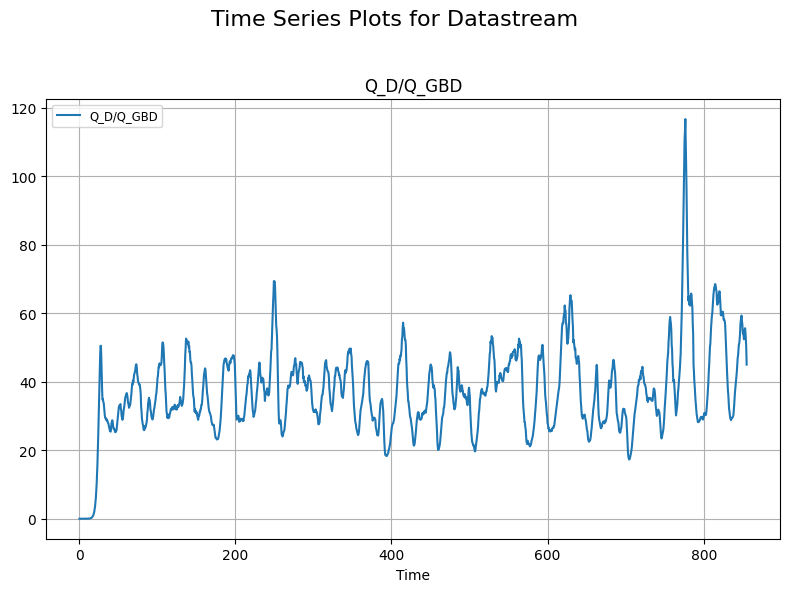

In [42]:
plotter.trace_plot(data_stream_cg,["Q_D/Q_GBD"])

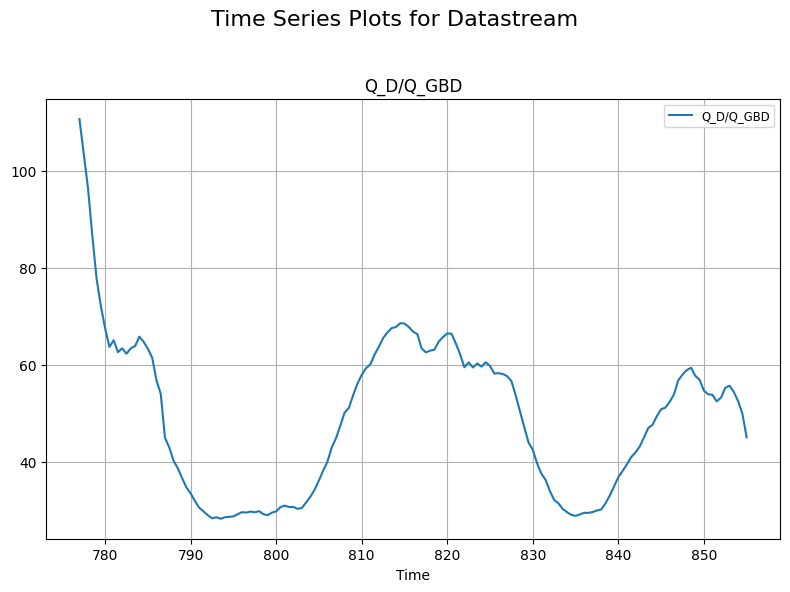

In [43]:
plotter.trace_plot(trimmed_df)

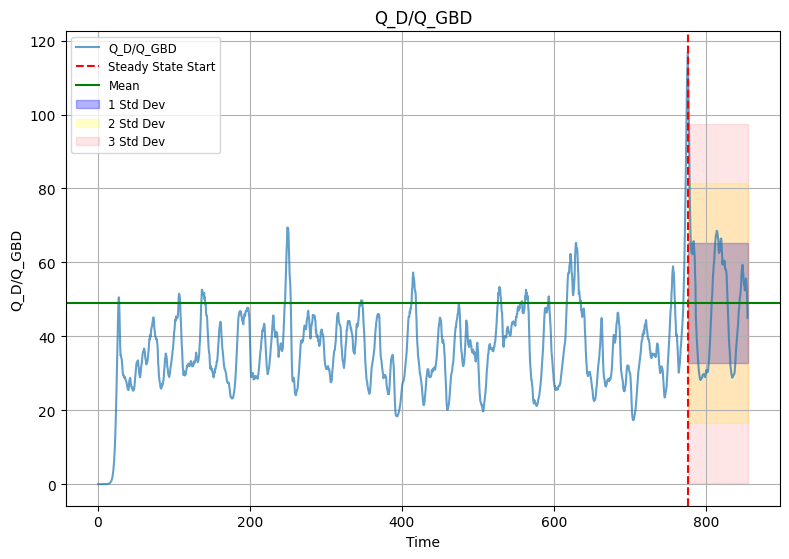

In [44]:
plotter.steady_state_automatic_plot(data_stream_cg,["Q_D/Q_GBD"])

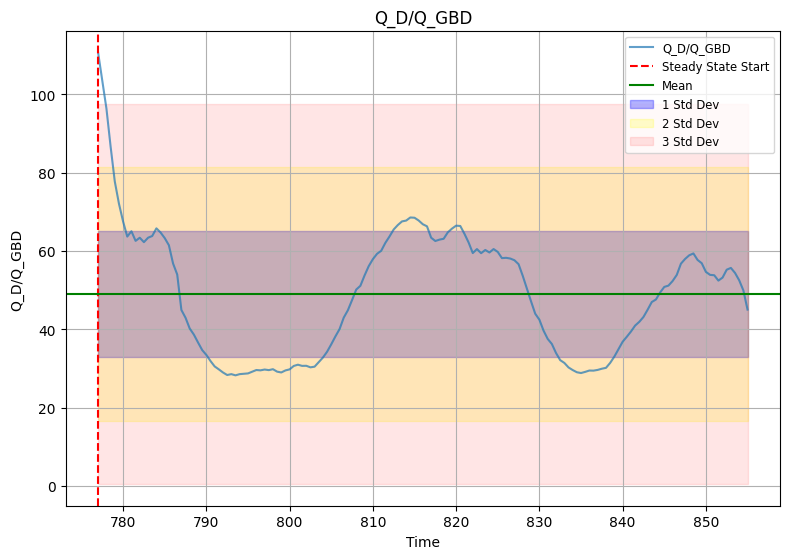

In [45]:
plotter.steady_state_automatic_plot(trimmed_df)

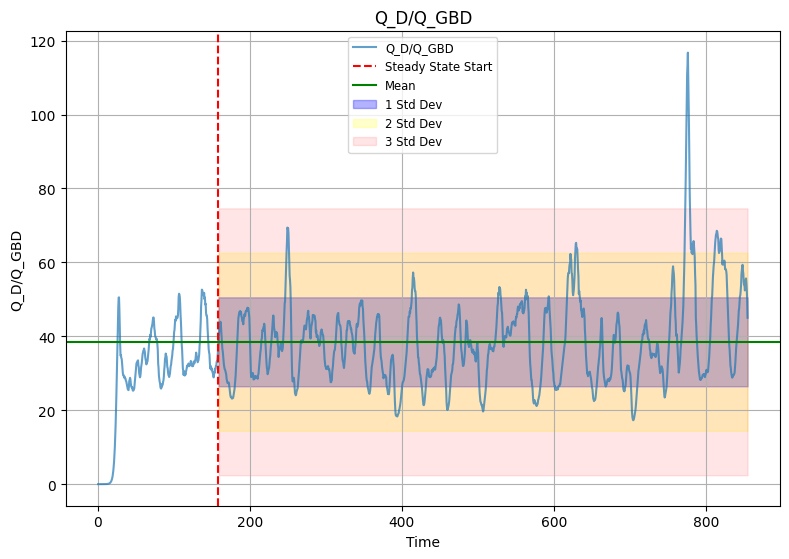

In [46]:
plotter.steady_state_plot(data_stream_cg,["Q_D/Q_GBD"], 158.59)

In [47]:
addition_info = trimmed_df.additional_data(method="sliding")

In [48]:
addition_info

{'Q_D/Q_GBD': {'A_est': 2.99071708617441,
  'p_est': 0.2844115455224129,
  'n_current': 127,
  'current_sem': 0.7541005614386169,
  'target_sem': 0.6786905052947553,
  'n_target': 183.94521997798063,
  'additional_samples': 57}}

In [49]:
addition_info = trimmed_df.additional_data()
addition_info

{'Q_D/Q_GBD': {'A_est': 2.99071708617441,
  'p_est': 0.2844115455224129,
  'n_current': 127,
  'current_sem': 0.7541005614386169,
  'target_sem': 0.6786905052947553,
  'n_target': 183.94521997798063,
  'additional_samples': 57}}

In [50]:
reduction_factor=0.1

In [51]:
addition_info = trimmed_df.additional_data(reduction_factor=0.2)
addition_info

{'Q_D/Q_GBD': {'A_est': 2.99071708617441,
  'p_est': 0.2844115455224129,
  'n_current': 127,
  'current_sem': 0.7541005614386169,
  'target_sem': 0.6032804491508936,
  'n_target': 278.31870523518984,
  'additional_samples': 152}}

In [52]:
addition_info = trimmed_df.additional_data(method="sliding", reduction_factor=0.2)
addition_info

{'Q_D/Q_GBD': {'A_est': 2.99071708617441,
  'p_est': 0.2844115455224129,
  'n_current': 127,
  'current_sem': 0.7541005614386169,
  'target_sem': 0.6032804491508936,
  'n_target': 278.31870523518984,
  'additional_samples': 152}}